In [1]:
using Pkg; Pkg.activate("../");
using LatticeLab

In [22]:
a1 = [1, 0]
a2 = [1/2, sqrt(3)/2] ;

In [23]:
BBOX(m,n) = ([-0.001,-0.001], # origin
             [1 0 ; 0 1],                 # supercell basis
             [m,n],                       # supercell shifts
             [true,true])                 # P.B.C. conditions


aa = hcat( 2 .*a1, 2 .*a2 ) |> Coordinates
dd = hcat( [0,0], a1, a2) |> Coordinates
mm = [ :A,    :B,    :C     ] |> Masses
xx = [ [:pz,],[:pz,],[:pz,] ] .|> Orbits

UC_Kagome = UnitCell(2, 3, aa, dd, mm, xx) ;

LN_Kagome = LatticeLab.link_info_by_distance_direction(
    Dict(:t => (1,[]),), # symbol => (distance, (directions))
    UC_Kagome;
    bounding_box = BBOX(1,1),
    rounding_digits=6
) ;

In [24]:
Kagome = build_lattice(LN_Kagome,BBOX(3,3)) ;

  0.004271 seconds (69.50 k allocations: 4.351 MiB)
  0.000507 seconds (7.78 k allocations: 379.703 KiB)


┌ Info: build_lattice() : 
│ 		 margin = 1
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:256
┌ Info: generate_R0_compute_EqV() : 
│ 		 bbox = ([-0.001, -0.001], [1 0; 0 1], [3, 3], Bool[1, 1])
│ 		 N_min, N_max = ([-2, -2], [5, 5])
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:39
┌ Info: generate_R0_compute_EqV() : compute EqV ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:53
┌ Info: generate_f() : main loop ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:180


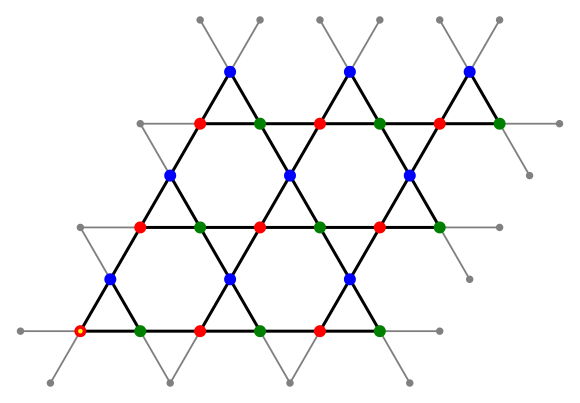

In [25]:
VSTYLE = Dict(
    :A=>("red",  6.0,:dot),
    :B=>("green",6.0,:dot),
    :C=>("blue", 6.0,:dot)
)
ESTYLE = Dict(
    :t=>("black", 3.0,:solid),
)
display("image/svg+xml", 
    show_lattice_svg(Kagome, VSTYLE, ESTYLE; upscale=60))